## 1. Import Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

## 2. Read Data

In [4]:
# Read the data
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## 3. Prep Data for Modeling

In [6]:
# Split the data based on the fetal_health field
X = df.drop(columns=['fetal_health']) 
y = df['fetal_health'] 

In [7]:
# Use an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Fit the scaler on the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test set
X_test_scaled = scaler.transform(X_test)

# Print the training set
X_train_scaled

array([[-0.33729067, -0.81221177, -0.20155041, ..., -0.28523289,
        -0.64124816, -0.52324436],
       [-0.03438833, -0.81221177, -0.17899672, ..., -0.07643603,
        -0.64124816, -0.52324436],
       [ 1.27818851,  2.06600693, -0.17899672, ...,  1.17634513,
        -0.08693716,  1.12096157],
       ...,
       [-1.34696516, -0.81221177, -0.20155041, ..., -2.7907952 ,
         1.57599585, -2.16745028],
       [-1.14503026, -0.55055552, -0.20155041, ..., -0.91162346,
        -0.53731485, -0.52324436],
       [-0.53922557, -0.81221177,  0.22696975, ..., -0.98122242,
         3.723951  , -0.52324436]])

## 4. Train Model

In [9]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

## 5. Evalute Model Performance

In [11]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 score): {r2}")

Mean Squared Error (MSE): 0.0716068573943662
R-squared (R2 score): 0.8073255830306175


## 6. Model Feature Importance

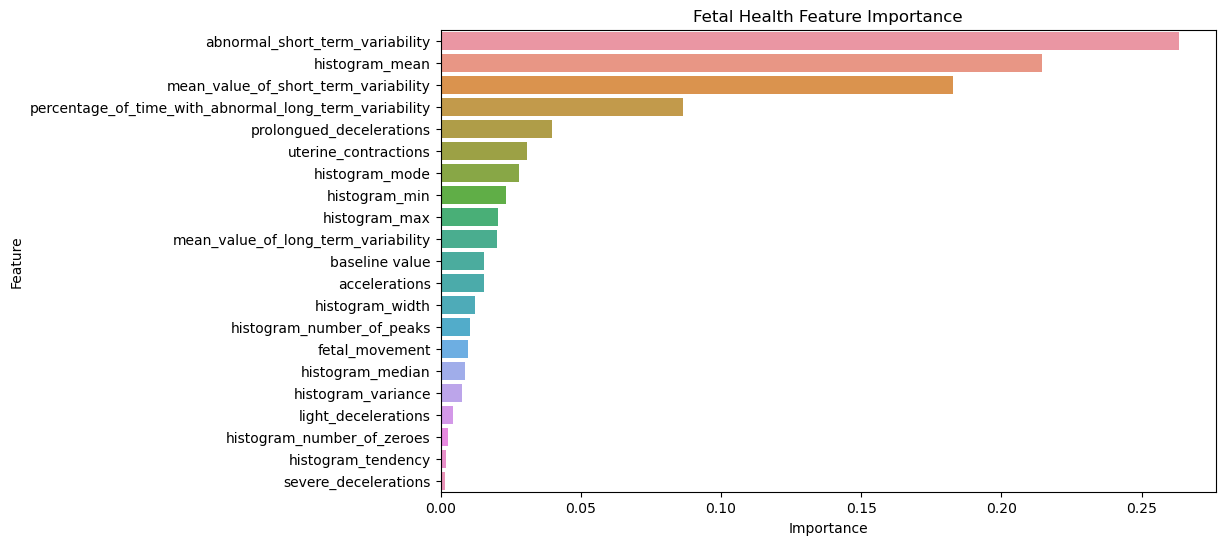

In [13]:
# Get feature importance from the model
feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Fetal Health Feature Importance')
plt.show()

### Remarks
#### Random Forest Regression is an effective model for predicting fetal health using this dataset. The rf model achieved an R-squared score of 0.807, indicating that approximately 80.7% of the variance for fetal health field was explained by the model. The Mean Squared Error (MSE) was 0.0716, which suggests the model performs well in predicting outcomes within the scope of the dataset. Key features such as abnormal short term variability, histogram mean, and mean value of short term variability were identified as strong predictors of fetal health. This highlights their importance in understanding the underlying factors driving the predictions.